# Market Basket Analysis
### By Chase Whitman

In [1]:
#!pip install mlxtend

In [1]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules, apriori
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('..//Datasets//teleco_market_basket.csv')

In [6]:
df.head()

,Item01,Item02,Item03,Item04,Item05,Item06,Item07,Item08,Item09,Item10,Item11,Item12,Item13,Item14,Item15,Item16,Item17,Item18,Item19,Item20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Logitech M510 Wireless mouse,HP 63 Ink,HP 65 ink,nonda USB C to USB Adapter,10ft iPHone Charger Cable,HP 902XL ink,Creative Pebble 2.0 Speakers,Cleaning Gel Universal Dust Cleaner,Micro Center 32GB Memory card,YUNSONG 3pack 6ft Nylon Lightning Cable,TopMate C5 Laptop Cooler pad,Apple USB-C Charger cable,HyperX Cloud Stinger Headset,TONOR USB Gaming Microphone,Dust-Off Compressed Gas 2 pack,3A USB Type C Cable 3 pack 6FT,HOVAMP iPhone charger,SanDisk Ultra 128GB card,FEEL2NICE 5 pack 10ft Lighning cable,FEIYOLD Blue light Blocking Glasses
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Apple Lightning to Digital AV Adapter,TP-Link AC1750 Smart WiFi Router,Apple Pencil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.shape

(15002, 20)

In [7]:
# Explore shape of dataset: 15,002 transactions
df.shape
print(f'The dataset contains {df.shape[0]} transactions.')

The dataset contains 15002 transactions.


In [8]:
# Explore number of unique items
df_list = df.values.tolist()
unique_values = len(set([item for group in df_list for item in group if str(item) != 'nan']))

print(f'There are {unique_values} unique items in the dataset.')

There are 119 unique items in the dataset.


### Onehot Encoding

In [9]:
# Convert dataframe to List of Lists (lol)
lol = []
for l in df.values.tolist():
    items = [i for i in l if str(i)!='nan']
    lol.append(items)
lol

[[],
 ['Logitech M510 Wireless mouse',
  'HP 63 Ink',
  'HP 65 ink',
  'nonda USB C to USB Adapter',
  '10ft iPHone Charger Cable',
  'HP 902XL ink',
  'Creative Pebble 2.0 Speakers',
  'Cleaning Gel Universal Dust Cleaner',
  'Micro Center 32GB Memory card',
  'YUNSONG 3pack 6ft Nylon Lightning Cable',
  'TopMate C5 Laptop Cooler pad',
  'Apple USB-C Charger cable',
  'HyperX Cloud Stinger Headset',
  'TONOR USB Gaming Microphone',
  'Dust-Off Compressed Gas 2 pack',
  '3A USB Type C Cable 3 pack 6FT',
  'HOVAMP iPhone charger',
  'SanDisk Ultra 128GB card',
  'FEEL2NICE 5 pack 10ft Lighning cable',
  'FEIYOLD Blue light Blocking Glasses'],
 [],
 ['Apple Lightning to Digital AV Adapter',
  'TP-Link AC1750 Smart WiFi Router',
  'Apple Pencil'],
 [],
 ['UNEN Mfi Certified 5-pack Lightning Cable'],
 [],
 ['Cat8 Ethernet Cable', 'HP 65 ink'],
 [],
 ['Dust-Off Compressed Gas 2 pack',
  'Screen Mom Screen Cleaner kit',
  'Moread HDMI to VGA Adapter',
  'HP 62XL Tri-Color ink',
  'Apple USB-

In [10]:
# Onehot encode features and create transaction encoder array
te = TransactionEncoder()
te_ary = te.fit(lol).transform(lol)

In [11]:
# Convert array to Pandas DataFrame
onehot = pd.DataFrame(te_ary, columns = te.columns_)
onehot.head()

,10ft iPHone Charger Cable,10ft iPHone Charger Cable 2 Pack,3 pack Nylon Braided Lightning Cable,3A USB Type C Cable 3 pack 6FT,5pack Nylon Braided USB C cables,ARRIS SURFboard SB8200 Cable Modem,Anker 2-in-1 USB Card Reader,Anker 4-port USB hub,Anker USB C to HDMI Adapter,Apple Lightning to Digital AV Adapter,...,hP 65 Tri-color ink,iFixit Pro Tech Toolkit,iPhone 11 case,iPhone 12 Charger cable,iPhone 12 Pro case,iPhone 12 case,iPhone Charger Cable Anker 6ft,iPhone SE case,nonda USB C to USB Adapter,seenda Wireless mouse
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
# Examine most purchased items
onehot.sum().sort_values(ascending=False)

Dust-Off Compressed Gas 2 pack         1788
Apple Pencil                           1348
VIVO Dual LCD Monitor Desk mount       1306
USB 2.0 Printer cable                  1282
HP 61 ink                              1229
                                       ... 
HooToo USB C Hub                         29
BENGOO G90000 headset                    14
Apple Pencil 2nd Gen                      7
Apple Power Adapter Extension Cable       5
NETGEAR Orbi Home Mesh WiFi System        3
Length: 119, dtype: int64

In [22]:
# # Export cleaned dataset
# onehot.to_csv(r'.\Task3_onehot_dataset.csv')

## Apriori algorithm

In [13]:
frequent_itemsets = apriori(onehot,
                           use_colnames=True,
                            max_len=2,
                           min_support=0.001)
frequent_itemsets

,support,itemsets
0,0.004533,(10ft iPHone Charger Cable)
1,0.025263,(10ft iPHone Charger Cable 2 Pack)
2,0.002600,(3 pack Nylon Braided Lightning Cable)
3,0.021264,(3A USB Type C Cable 3 pack 6FT)
4,0.009532,(5pack Nylon Braided USB C cables)
...,...,...
1253,0.003733,"(YUNSONG 3pack 6ft Nylon Lightning Cable, VIVO..."
1254,0.001333,"(VIVO Dual LCD Monitor Desk mount, hP 65 Tri-c..."
1255,0.003333,"(VIVO Dual LCD Monitor Desk mount, iPhone Char..."
1256,0.004933,"(VIVO Dual LCD Monitor Desk mount, iPhone SE c..."


In [14]:
print(f'There are {len(frequent_itemsets)} frequent itemsets.')

There are 1258 frequent itemsets.


In [15]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)
print(f'There are {rules.shape[0]} association rules.')

There are 2274 association rules.


In [16]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(10ft iPHone Charger Cable),(Apple Pencil),0.004533,0.089855,0.001067,0.235294,2.618607,0.000659,1.190190
1,(Apple Pencil),(10ft iPHone Charger Cable),0.089855,0.004533,0.001067,0.011869,2.618607,0.000659,1.007425
2,(10ft iPHone Charger Cable),(Dust-Off Compressed Gas 2 pack),0.004533,0.119184,0.001600,0.352941,2.961311,0.001060,1.361261
3,(Dust-Off Compressed Gas 2 pack),(10ft iPHone Charger Cable),0.119184,0.004533,0.001600,0.013423,2.961311,0.001060,1.009011
4,(10ft iPHone Charger Cable),(Nylon Braided Lightning to USB cable),0.004533,0.047660,0.001067,0.235294,4.936898,0.000850,1.245367


## Pruning

In [17]:
def filter_rules(rules, support=0.005, confidence=0.5, lift=1.0):
    return rules[(rules['lift'] > lift) &
                      (rules['support'] > support) &
                      (rules['confidence'] > confidence)]

In [18]:
filter_rules(rules, support=0.01, lift=2.0, confidence=0.4)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
29,(10ft iPHone Charger Cable 2 Pack),(Dust-Off Compressed Gas 2 pack),0.025263,0.119184,0.011532,0.456464,3.829910,0.008521,1.620530
942,(FEIYOLD Blue light Blocking Glasses),(Dust-Off Compressed Gas 2 pack),0.032929,0.119184,0.013798,0.419028,3.515807,0.009874,1.516108
1037,(SanDisk Ultra 64GB card),(Dust-Off Compressed Gas 2 pack),0.049127,0.119184,0.020464,0.416554,3.495043,0.014609,1.509677


## Visualizations

In [19]:
# Generate rules with lower support value
rules = filter_rules(rules, support=0.0005, lift=2.0, confidence=0.4)
print('Number of rules:', rules.shape[0])

Number of rules: 18


In [20]:
# Convert labels to strings
rules['antecedent'] = rules['antecedents'].apply(lambda antecedent: list(antecedent)[0])
rules['consequent'] = rules['consequents'].apply(lambda consequent: list(consequent)[0])
rules['rule'] = rules.index

# Subset dataframe for coordinates plot
coords = rules[['antecedent', 'consequent', 'rule']]

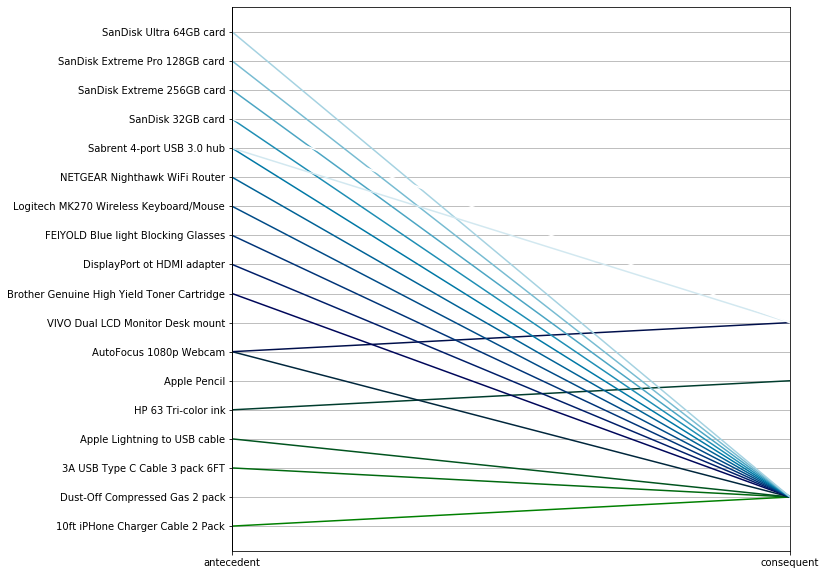

In [21]:
from pandas.plotting import parallel_coordinates

#Parallel coordinates plot
plt.figure(figsize=(10,10))
parallel_coordinates(coords, 'rule', colormap='ocean')
plt.gca().legend_.remove()
plt.show()